:# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Achmad Faiz Izzi]
- **Email:** [ahmadfaiz8365@gmail.com]
- **ID Dicoding:** [MC227D5Y1450]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda berdasarkan musim?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Machine Learning/hour.csv"
df_hour = pd.read_csv(file_path)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
file_path1 = "/content/drive/MyDrive/Machine Learning/day.csv"
df_day = pd.read_csv(file_path1)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Assessing Data

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
print("Jumlah duplikasi: ",df_hour.duplicated().sum())
df_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("Jumlah duplikasi: ",df_day.duplicated().sum())
df_day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
#karena tidak ada missing value dan duplicate data, maka data tidak perlu di cleaning.

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore df_hour

In [11]:
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11610,11611,2012-05-03,2,1,5,23,0,4,1,1,0.60,0.5606,0.83,0.0000,21,100,121
15752,15753,2012-10-23,4,1,10,13,0,2,1,2,0.64,0.6212,0.44,0.0000,59,244,303
9084,9085,2012-01-19,1,1,1,10,0,4,1,1,0.14,0.2121,0.59,0.0000,10,98,108
6111,6112,2011-09-17,3,0,9,5,0,6,0,1,0.46,0.4545,0.72,0.1642,2,3,5
8996,8997,2012-01-15,1,1,1,17,0,0,0,1,0.22,0.2121,0.25,0.2537,15,131,146


In [14]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [12]:
season_mapping = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
weather_mapping = {1: "Cerah", 2: "Berawan", 3: "Hujan Ringan", 4: "Hujan Lebat"}
df_hour["season_label"] = df_hour["season"].map(season_mapping)
df_hour["weather_label"] = df_hour["weathersit"].map(weather_mapping)

In [13]:
pivot_table = df_hour.groupby(by=["season_label", "weather_label"]).agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()
pivot_table

season_label weather_label     cnt                                 
                                  sum        mean  max min         std
0          Fall       Berawan  251452  201.483974  905   1  173.833617
1          Fall         Cerah  546491  209.463779  967   1  190.891851
2          Fall  Hujan Ringan   43670  116.453333  856   1  127.471365
3        Spring       Berawan  207363  181.261364  957   1  164.832349
4        Spring         Cerah  664463  232.410983  873   1  198.312457
5        Spring  Hujan Ringan   46763  115.179803  782   1  130.760396
6        Summer       Berawan  212932  224.848997  868   2  185.406665
7        Summer         Cerah  801941  244.494207  977   1  201.732720
8        Summer  Hujan Ringan   46256  171.955390  891   1  175.871513
9        Winter       Berawan  124205  103.074689  712   1  106.154745
10       Winter         Cerah  325278  122.055535  801   1  127.384258
11       Winter   Hujan Lebat     223   74.333333  164  23   77.925178
12       Winter  Hujan Ringan   21642   58.650407  520   1   74.793446

### Explore df_day

In [14]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
114,115,2011-04-25,2,0,4,0,1,1,1,0.606667,0.574500,0.776667,0.185333,773,3300,4073
268,269,2011-09-26,4,0,9,0,1,1,2,0.649167,0.589042,0.848333,0.110700,684,3946,4630
501,502,2012-05-16,2,1,5,0,3,1,1,0.636667,0.595975,0.697917,0.122512,991,6433,7424
304,305,2011-11-01,4,0,11,0,2,1,1,0.400833,0.397088,0.683750,0.135571,410,3658,4068
393,394,2012-01-29,1,1,1,0,0,0,1,0.282500,0.272721,0.311250,0.240050,558,2685,3243


In [15]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [16]:
season_mapping = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
weather_mapping = {1: "Cerah", 2: "Berawan", 3: "Hujan Ringan", 4: "Hujan Lebat"}
df_day["season_label"] = df_day["season"].map(season_mapping)
df_day["weather_label"] = df_day["weathersit"].map(weather_mapping)

In [17]:
pivot_table = df_day.groupby(by=["season_label", "weather_label"]).agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()
pivot_table

season_label weather_label     cnt                                      
                                  sum         mean   max   min          std
0          Fall       Berawan  302510  4654.000000  7852  1096  1523.445365
1          Fall         Cerah  519487  5043.563107  8555  1495  1595.693909
2          Fall  Hujan Ringan   19616  1961.600000  4639    22  1329.287378
3        Spring       Berawan  288096  4236.705882  8362  1471  1579.038070
4        Spring         Cerah  626986  5548.548673  8294  2028  1467.655078
5        Spring  Hujan Ringan    3507  1169.000000  1685   795   461.679543
6        Summer       Berawan  250679  5222.479167  7582  1115  1431.160502
7        Summer         Cerah  799443  5878.257353  8714  3285  1356.647125
8        Summer  Hujan Ringan   11007  2751.750000  4459  1842  1199.339923
9        Winter       Berawan  155573  2357.166667  7836   605  1313.332082
10       Winter         Cerah  312036  2811.135135  6312   431  1409.960622
11       Winter  Hujan Ringan    3739   934.750000  2169   441   826.272100

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola jumlah penyewaan sepeda sepanjang hari?

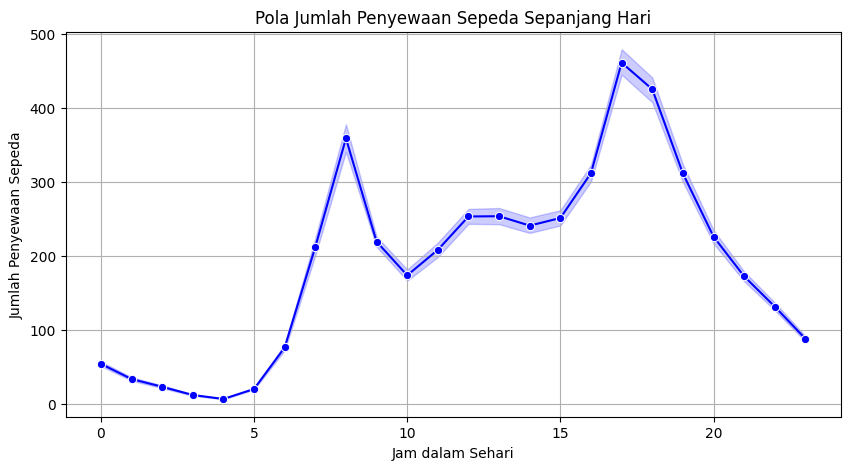

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_hour["hr"], y=df_hour["cnt"], marker="o", color="b")
plt.title("Pola Jumlah Penyewaan Sepeda Sepanjang Hari")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()


### Pertanyaan 2: Bagaimana distribusi jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan?

In [19]:
df_day["day_type"] = df_day["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

<ipython-input-20-e37257db3fbc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_day["day_type"], y=df_day["cnt"], palette="Set2")


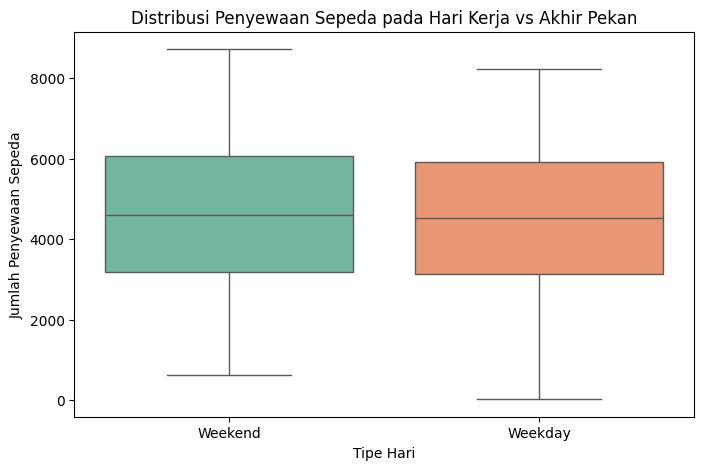

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_day["day_type"], y=df_day["cnt"], palette="Set2")
plt.title("Distribusi Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

### Pertanyaan 3: Bagaimana distribusi jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan?

In [21]:
day_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
               4: "Thursday", 5: "Friday", 6: "Saturday"}
df_day["weekday_label"] = df_day["weekday"].map(day_mapping)

In [22]:
weekly_trend = df_day.groupby("weekday_label")["cnt"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

<ipython-input-23-38cba60facca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_trend.index, y=weekly_trend.values, palette="coolwarm")


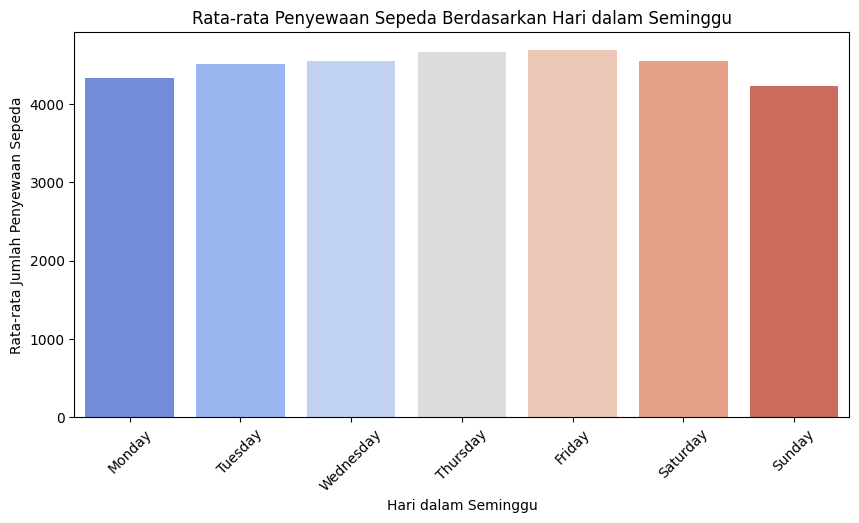

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_trend.index, y=weekly_trend.values, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 4: Bagaimana hubungan antara suhu dan jumlah penyewaan sepeda?

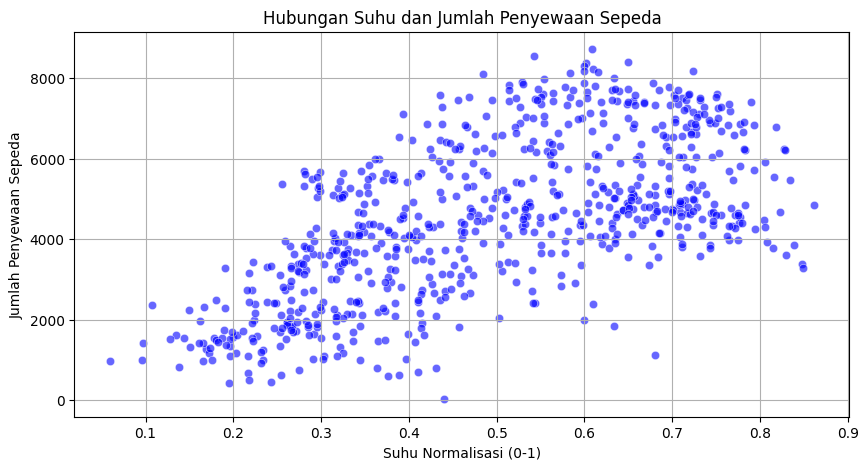

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_day["temp"], y=df_day["cnt"], alpha=0.6, color="b")
plt.title("Hubungan Suhu dan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu Normalisasi (0-1)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [25]:
#RFM ANALYSIS
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
latest_date = df_day["dteday"].max()
df_day["Recency"] = (latest_date - df_day["dteday"]).dt.days
df_day["Frequency"] = df_day.groupby("dteday")["cnt"].transform("count")
df_day["Monetary"] = df_day.groupby("dteday")["cnt"].transform("sum")
df_day[["dteday", "Recency", "Frequency", "Monetary"]].sample(5)

,dteday,Recency,Frequency,Monetary
144,2011-05-25,586,1,4978
375,2012-01-11,355,1,2177
336,2011-12-03,394,1,3614
334,2011-12-01,396,1,3727
87,2011-03-29,643,1,2425


In [26]:
#GEOSPATIAL ANALYSIS (Berbasis Musim dan Kondisi Cuaca) ---
season_mapping = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
weather_mapping = {1: "Cerah", 2: "Berawan", 3: "Hujan Ringan", 4: "Hujan Lebat"}
df_day["season_label"] = df_day["season"].map(season_mapping)
df_day["weather_label"] = df_day["weathersit"].map(weather_mapping)

In [27]:
geo_pivot = df_day.groupby(["season_label", "weather_label"]).agg({
    "cnt": ["sum", "mean", "max", "min", "std"]
}).reset_index()
geo_pivot

season_label weather_label     cnt                                      
                                  sum         mean   max   min          std
0          Fall       Berawan  302510  4654.000000  7852  1096  1523.445365
1          Fall         Cerah  519487  5043.563107  8555  1495  1595.693909
2          Fall  Hujan Ringan   19616  1961.600000  4639    22  1329.287378
3        Spring       Berawan  288096  4236.705882  8362  1471  1579.038070
4        Spring         Cerah  626986  5548.548673  8294  2028  1467.655078
5        Spring  Hujan Ringan    3507  1169.000000  1685   795   461.679543
6        Summer       Berawan  250679  5222.479167  7582  1115  1431.160502
7        Summer         Cerah  799443  5878.257353  8714  3285  1356.647125
8        Summer  Hujan Ringan   11007  2751.750000  4459  1842  1199.339923
9        Winter       Berawan  155573  2357.166667  7836   605  1313.332082
10       Winter         Cerah  312036  2811.135135  6312   431  1409.960622
11       Winter  Hujan Ringan    3739   934.750000  2169   441   826.272100

In [28]:
# CLUSTERING ANALYSIS (Manual Grouping & Binning) ---
# Membuat kategori berdasarkan jumlah penyewaan sepeda (cnt)
def rental_category(cnt):
    if cnt < 2000:
        return "Low Rental"
    elif 2000 <= cnt < 5000:
        return "Medium Rental"
    else:
        return "High Rental"
df_day["rental_category"] = df_day["cnt"].apply(rental_category)
rental_distribution = df_day["rental_category"].value_counts()

<ipython-input-29-f033c69cb5d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rental_distribution.index, y=rental_distribution.values, palette="coolwarm")


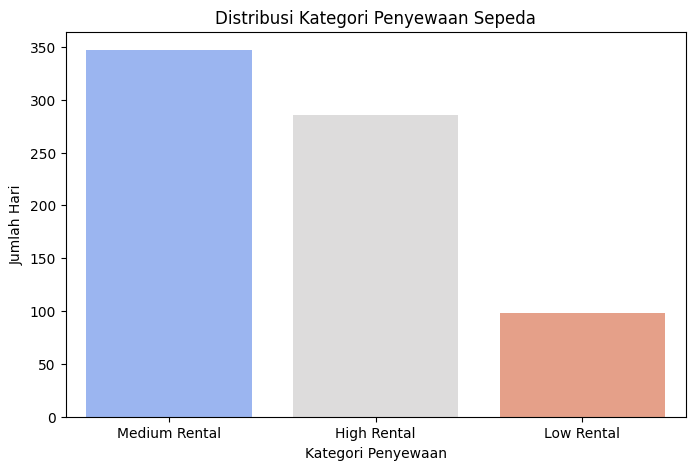

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x=rental_distribution.index, y=rental_distribution.values, palette="coolwarm")
plt.title("Distribusi Kategori Penyewaan Sepeda")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.show()

In [30]:
df_day[["dteday", "cnt", "rental_category"]].sample(5)

,dteday,cnt,rental_category
345,2011-12-12,3310,Medium Rental
619,2012-09-11,7767,High Rental
326,2011-11-23,2566,Medium Rental
126,2011-05-07,4714,Medium Rental
484,2012-04-29,6304,High Rental


## Conclusion

- Conclution pertanyaan 1 =
1. Penyewaan sepeda memiliki dua puncak utama: pagi sekitar jam 8 dan sore sekitar jam 17-18.
2. Pola ini menunjukkan bahwa sepeda banyak digunakan untuk berangkat dan pulang kerja/sekolah.
3. Jumlah penyewaan menurun di tengah hari dan malam.
- Conclution pertanyaan 2 =
1. Hari kerja memiliki jumlah penyewaan yang lebih tinggi dan lebih bervariasi dibanding akhir pekan.
2. Akhir pekan memiliki penyebaran penyewaan yang lebih stabil dan cenderung lebih rendah.
- Conclution pertanyaan 3 =
1. Penyewaan tertinggi terjadi pada hari kerja (Senin-Jumat), dengan puncak di hari Kamis dan Jumat.
2. Penyewaan menurun pada akhir pekan (Sabtu & Minggu), kemungkinan karena lebih sedikit orang yang bepergian untuk bekerja/sekolah.
3. Ini menunjukkan bahwa mayoritas pengguna sepeda adalah pekerja atau pelajar.
- Conclution pertanyaan 4 =
1. Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda.
2. Semakin tinggi suhu, semakin banyak sepeda yang disewa.
3. Penyewaan sepeda meningkat signifikan pada suhu hangat hingga panas, dan berkurang pada suhu yang lebih dingin.